---
title: "Out of distribution Keypoint/Videos"
author: "Ali Zaidi"
date: "2025-12-18"
categories: [Data Analysis]
description: "Now that we have a reliable normalization and centering method for our keypoints, lets try to plot things out of their distribution on videos themselves"
format:
  html:
    code-fold: true
jupyter: python3
---

In [3]:
#| include: false 
from fastai.vision.all import *
from eagle_swing.clipper import *
from eagle_swing.plot import *
from eagle_swing.temporal import *
from tqdm import tqdm
#%matplotlib widget

In [4]:
#| include: false
plt.style.use('dark_background')

In [5]:
#cleaned_df_paths =[fpath for fpath in get_files('../../../data/full_videos/ymirza/', extensions='.csv') if fpath.name=='clean_lbls.csv']
cleaned_df_paths =[fpath for fpath in get_files('../decision_trees', extensions='.csv') ]
cleaned_df_paths

[Path('../decision_trees/nov16_df.csv'),
 Path('../decision_trees/sep14_df.csv'),
 Path('../decision_trees/oct25_df.csv')]

In [104]:
df_holder = []
for df_path in cleaned_df_paths:
    df_holder.append(pd.read_csv(df_path))
cleaned_df = pd.concat(df_holder).reset_index(drop=True)
cleaned_df.shape

(133, 10)

In [105]:
cleaned_df.head(1)

,clip_name,video_name,swing_index,score,pkl_path,first_higher_wrists_backswing_frame,swing_day,start_idx,end_idx,top_backswing_idx
0,IMG_1023_swing_0_score_1,IMG_1023,0,1,../../../data/full_videos/ymirza/aug9/IMG_1023/keypoints/IMG_1023.pkl,1540,aug9,1530,1560,1550


In [106]:
before_increment = 60
after_increment = 30
cleaned_df['start_idx'] = cleaned_df['top_backswing_idx'] - before_increment
cleaned_df['end_idx'] = cleaned_df['top_backswing_idx'] + after_increment

In [107]:
(cleaned_df.score == 5).sum(), (cleaned_df.score == 1).sum()

(25, 32)

In [113]:
rand_idxs = np.random.randint(0, 25, 25)#10)
df1 = cleaned_df[cleaned_df.score == 1].reset_index(drop=True)#.iloc[rand_idxs].reset_index(drop=True)
df5 = cleaned_df[cleaned_df.score == 5].reset_index(drop=True)#.iloc[rand_idxs].reset_index(drop=True)
test_df = pd.concat([df1, df5]).reset_index(drop=True)
print(df5.shape), print(df1.shape), print(test_df.shape)

(25, 10)
(32, 10)
(57, 10)


(None, None, None)

In [117]:
for vname in df1.video_name.unique():
    if vname in df5.video_name.unique():
        print(vname)

IMG_1023
IMG_1019
IMG_1017
IMG_1086
IMG_1087
IMG_1091
IMG_1185
IMG_1183
IMG_1192


In [118]:
df5_sameday = df5[df5.video_name == 'IMG_1023'].reset_index(drop=True)
df1_sameday = df1[df1.video_name == 'IMG_1023'].reset_index(drop=True)
test_df_sameday = pd.concat([df1_sameday, df5_sameday]).reset_index(drop=True)
print(df5_sameday.shape), print(df1_sameday.shape), print(test_df_sameday.shape)

(4, 10)
(5, 10)
(9, 10)


(None, None, None)

In [125]:
#test_df_sameday

In [127]:
#swing = SwingExtractor(test_df.iloc[len(test_df)])
swings = [SwingExtractor(test_df_sameday.iloc[x]) for x in range(len(test_df_sameday))]
#swings = [SwingExtractor(test_df.iloc[x]) for x in range(len(test_df))]
kps_list = [swings[x].kp_extractor for x in range(len(swings))]
lbls = [swings[x].clip_name for x in range(len(swings))]
scores = [swing.row.score for swing in swings]
print(lbls)

['IMG_1023_swing_0_score_1', 'IMG_1023_swing_1_score_1', 'IMG_1023_swing_3_score_1', 'IMG_1023_swing_7_score_1', 'IMG_1023_swing_12_score_1', 'IMG_1023_swing_4_score_5', 'IMG_1023_swing_5_score_5', 'IMG_1023_swing_6_score_5', 'IMG_1023_swing_15_score_5']


In [128]:
scores

[1, 1, 1, 1, 1, 5, 5, 5, 5]

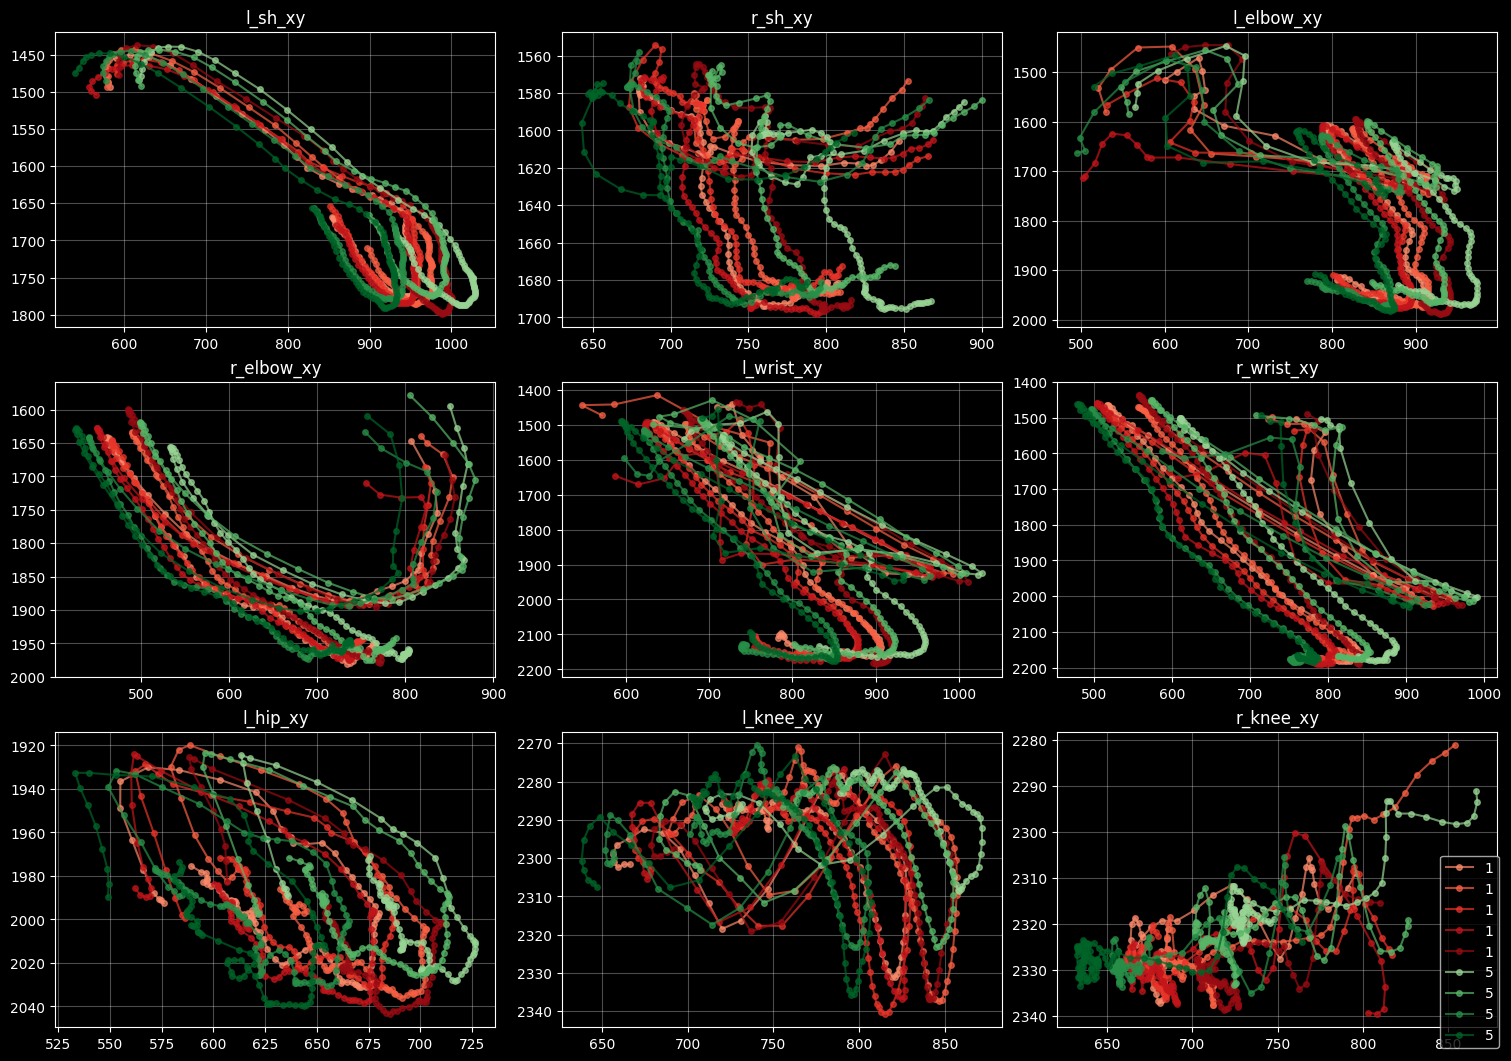

In [129]:
#swings = [SwingExtractor(test_df.iloc[x], by_ref=True) for x in range(len(test_df))]
#kps_list = [swings[x].kp_extractor for x in range(len(swings))]
#lbls = [swings[x].clip_name for x in range(len(swings))]
#scores = [swing.row.score for swing in swings]
plot_attributes(swings, 
                ['l_sh_xy', #'l_sh_vel', 'l_sh_acc', 
                 'r_sh_xy', #'r_sh_vel', 'r_sh_acc', 
                 'l_elbow_xy',# 'l_elbow_vel', 'l_elbow_acc', 
                 'r_elbow_xy',# 'r_elbow_vel', 'r_elbow_acc', 
                 'l_wrist_xy',# 'l_wrist_vel', 'l_wrist_acc', 
                 'r_wrist_xy',# 'r_wrist_vel', 'r_wrist_acc', 
                 'l_hip_xy',# 'l_hip_vel', 'l_hip_acc', 
                 #'r_hip_xy', #'r_hip_vel', 'r_hip_acc', 
                 'l_knee_xy',# 'l_knee_vel', 'l_knee_acc', 
                 'r_knee_xy', #'r_knee_vel', 'r_knee_acc', 
                 ], 
                scores,
                scatter=True)

In [145]:
clip1_name = df1.clip_name[0]
start_idx = df1.start_idx[0]
end_idx = df1.end_idx[0]
video_name = f"{df1.pkl_path[0][:-3]}mp4"
frames1, fps = get_frames(video_name, start_idx=start_idx, num_frames=end_idx-start_idx,
                        resize_dim=None)
clip5_name = df5.clip_name[0]
start_idx = df5.start_idx[0]
end_idx = df5.end_idx[0]
video_name = f"{df5.pkl_path[0][:-3]}mp4"
frames5, fps = get_frames(video_name, start_idx=start_idx, num_frames=end_idx-start_idx,
                        resize_dim=None)
frames1.shape, frames5.shape, print(clip1_name), print(clip5_name)

100%|████████████████████████████████████| 90/90 [00:01<00:00, 62.91it/s]

IMG_1023_swing_0_score_1
IMG_1023_swing_4_score_5


((90, 3840, 2160, 3), (90, 3840, 2160, 3), None, None)

In [146]:
swing1 = SwingExtractor(df1.iloc[0])
swing5 = SwingExtractor(df5.iloc[0])
kp_original = swing1.kps[...,:2]#kp_extractor.kps[...,:2]
kp_comparison = swing5.kps[...,:2]#.kp_extractor.kps[...,:2]

In [31]:
#debug_keypoint_alignment(frames, kp_original, frame_idx=0)

In [32]:
def debug_keypoint_alignment(video_frames, keypoints, frame_idx=0):
    """
    Visualize keypoints to understand their coordinate system
    """
    import matplotlib.pyplot as plt
    
    height, width = video_frames.shape[1:3]
    
    # Get one frame of keypoints
    kp = keypoints[frame_idx, :, :2].copy()
    
    print(f"Video dimensions: {width}w x {height}h")
    print(f"Raw keypoint sample (first 5 points):")
    print(kp[:5])
    
    # Try different normalization approaches
    fig, axes = plt.subplots(2, 2, figsize=(15, 15))
    
    # Approach 1: Min-Max normalization
    kp1 = kp.copy()
    x_min, x_max = keypoints[:, :, 0].min(), keypoints[:, :, 0].max()
    y_min, y_max = keypoints[:, :, 1].min(), keypoints[:, :, 1].max()
    kp1[:, 0] = (kp1[:, 0] - x_min) / (x_max - x_min) * width
    kp1[:, 1] = (kp1[:, 1] - y_min) / (y_max - y_min) * height
    
    axes[0, 0].imshow(video_frames[frame_idx])
    axes[0, 0].scatter(kp1[:, 0], kp1[:, 1], c='red', s=100)
    axes[0, 0].set_title('Min-Max Normalization')
    
    # Approach 2: Assume already pixel coordinates
    axes[0, 1].imshow(video_frames[frame_idx])
    axes[0, 1].scatter(kp[:, 0], kp[:, 1], c='red', s=100)
    axes[0, 1].set_title('Raw Coordinates (no normalization)')
    
    # Approach 3: Center-based normalization (common in pose estimation)
    kp3 = kp.copy()
    # Shift to positive range first, then scale
    kp3[:, 0] = (kp3[:, 0] + abs(x_min)) / (x_max - x_min) * width
    kp3[:, 1] = (kp3[:, 1] + abs(y_min)) / (y_max - y_min) * height
    
    axes[1, 0].imshow(video_frames[frame_idx])
    axes[1, 0].scatter(kp3[:, 0], kp3[:, 1], c='red', s=100)
    axes[1, 0].set_title('Alternative Scaling')
    
    # Approach 4: Flip Y axis (some systems use inverted Y)
    kp4 = kp1.copy()
    kp4[:, 1] = height - kp4[:, 1]
    
    axes[1, 1].imshow(video_frames[frame_idx])
    axes[1, 1].scatter(kp4[:, 0], kp4[:, 1], c='red', s=100)
    axes[1, 1].set_title('Min-Max with Y-axis flipped')
    
    plt.tight_layout()
    plt.show()
    
    return kp1, kp, kp3, kp4

In [132]:
def analyze_keypoints(kp_original, kp_comparison):
    """Analyze keypoint coordinate ranges"""
    print("=== KEYPOINT ANALYSIS ===")
    print(f"Original keypoints:")
    print(f"  X range: [{kp_original[:, :, 0].min():.3f}, {kp_original[:, :, 0].max():.3f}]")
    print(f"  Y range: [{kp_original[:, :, 1].min():.3f}, {kp_original[:, :, 1].max():.3f}]")
    print(f"  X mean: {kp_original[:, :, 0].mean():.3f}, std: {kp_original[:, :, 0].std():.3f}")
    print(f"  Y mean: {kp_original[:, :, 1].mean():.3f}, std: {kp_original[:, :, 1].std():.3f}")
    
    print(f"\nComparison keypoints:")
    print(f"  X range: [{kp_comparison[:, :, 0].min():.3f}, {kp_comparison[:, :, 0].max():.3f}]")
    print(f"  Y range: [{kp_comparison[:, :, 1].min():.3f}, {kp_comparison[:, :, 1].max():.3f}]")
    print(f"  X mean: {kp_comparison[:, :, 0].mean():.3f}, std: {kp_comparison[:, :, 0].std():.3f}")
    print(f"  Y mean: {kp_comparison[:, :, 1].mean():.3f}, std: {kp_comparison[:, :, 1].std():.3f}")

# Run this first to understand your data
analyze_keypoints(kp_original, kp_comparison)


=== KEYPOINT ANALYSIS ===
Original keypoints:
  X range: [460.838, 1043.812]
  Y range: [1420.057, 2755.042]
  X mean: 789.249, std: 152.795
  Y mean: 1917.904, std: 375.864

Comparison keypoints:
  X range: [533.160, 1117.895]
  Y range: [1405.951, 2740.798]
  X mean: 849.725, std: 157.690
  Y mean: 1918.282, std: 366.857


In [34]:
def overlay_keypoints_on_video(
    video_frames,
    keypoints_original,
    keypoints_comparison,
    skeleton_connections=None,
    original_color=(0, 255, 0),
    comparison_color=(0, 0, 255),
    radius=4,
    thickness=2,
    show_connections=True,
    show_difference_lines=False,
    normalize_method='minmax'  # 'minmax', 'none', or 'denormalize'
):
    """
    Overlay keypoints with flexible normalization handling.
    
    normalize_method options:
    - 'minmax': Scale from current range to [0, width] and [0, height]
    - 'none': Keypoints already in pixel coordinates
    - 'denormalize': Keypoints in [0, 1] range (multiply by dimensions)
    """
    
    output_video = video_frames.copy()
    
    if len(video_frames.shape) == 4:
        num_frames, height, width, channels = video_frames.shape
    else:
        num_frames, height, width = video_frames.shape
        
    print(f"Video: {width}w x {height}h, {num_frames} frames")
    
    min_frames = min(num_frames, keypoints_original.shape[0], keypoints_comparison.shape[0])
    
    # Calculate normalization parameters if using minmax
    if normalize_method == 'minmax':
        x_min = min(keypoints_original[:, :, 0].min(), keypoints_comparison[:, :, 0].min())
        x_max = max(keypoints_original[:, :, 0].max(), keypoints_comparison[:, :, 0].max())
        y_min = min(keypoints_original[:, :, 1].min(), keypoints_comparison[:, :, 1].min())
        y_max = max(keypoints_original[:, :, 1].max(), keypoints_comparison[:, :, 1].max())
        print(f"Min-Max normalization: X[{x_min:.3f}, {x_max:.3f}] -> [0, {width}]")
        print(f"                       Y[{y_min:.3f}, {y_max:.3f}] -> [0, {height}]")
    
    for frame_idx in range(min_frames):
        frame = output_video[frame_idx]
        
        kp_orig = keypoints_original[frame_idx, :, :2].copy().astype(np.float32)
        kp_comp = keypoints_comparison[frame_idx, :, :2].copy().astype(np.float32)
        
        # Apply appropriate normalization
        if normalize_method == 'minmax':
            # Scale from [min, max] to [0, dimension]
            kp_orig[:, 0] = (kp_orig[:, 0] - x_min) / (x_max - x_min) * width
            kp_orig[:, 1] = (kp_orig[:, 1] - y_min) / (y_max - y_min) * height
            kp_comp[:, 0] = (kp_comp[:, 0] - x_min) / (x_max - x_min) * width
            kp_comp[:, 1] = (kp_comp[:, 1] - y_min) / (y_max - y_min) * height
        elif normalize_method == 'denormalize':
            # Assume [0, 1] range
            kp_orig[:, 0] *= width
            kp_orig[:, 1] *= height
            kp_comp[:, 0] *= width
            kp_comp[:, 1] *= height
        # else 'none' - use as-is
        
        if frame_idx == 0:
            print(f"Frame 0 sample point: ({kp_orig[0, 0]:.1f}, {kp_orig[0, 1]:.1f})")
        
        # Draw skeleton connections for original
        if show_connections and skeleton_connections is not None:
            for start_idx, end_idx in skeleton_connections:
                if start_idx < len(kp_orig) and end_idx < len(kp_orig):
                    pt1 = (int(kp_orig[start_idx, 0]), int(kp_orig[start_idx, 1]))
                    pt2 = (int(kp_orig[end_idx, 0]), int(kp_orig[end_idx, 1]))
                    cv2.line(frame, pt1, pt2, original_color, max(1, thickness // 2))
        
        # Draw skeleton connections for comparison
        if show_connections and skeleton_connections is not None:
            for start_idx, end_idx in skeleton_connections:
                if start_idx < len(kp_comp) and end_idx < len(kp_comp):
                    pt1 = (int(kp_comp[start_idx, 0]), int(kp_comp[start_idx, 1]))
                    pt2 = (int(kp_comp[end_idx, 0]), int(kp_comp[end_idx, 1]))
                    cv2.line(frame, pt1, pt2, comparison_color, max(1, thickness // 2))
        
        # Draw difference lines
        if show_difference_lines:
            for i in range(min(len(kp_orig), len(kp_comp))):
                pt1 = (int(kp_orig[i, 0]), int(kp_orig[i, 1]))
                pt2 = (int(kp_comp[i, 0]), int(kp_comp[i, 1]))
                cv2.line(frame, pt1, pt2, (255, 255, 0), 1)
        
        # Draw original keypoints (green)
        for i in range(len(kp_orig)):
            pt = (int(kp_orig[i, 0]), int(kp_orig[i, 1]))
            cv2.circle(frame, pt, radius, original_color, -1)
            cv2.circle(frame, pt, radius + 1, (0, 0, 0), 1)
        
        # Draw comparison keypoints (RED)
        for i in range(len(kp_comp)):
            pt = (int(kp_comp[i, 0]), int(kp_comp[i, 1]))
            cv2.circle(frame, pt, radius, comparison_color, -1)
            cv2.circle(frame, pt, radius + 1, (0, 0, 0), 1)
    
    return output_video

In [73]:
# COCO 17-keypoint skeleton connections (start_index, end_index)
COCO_SKELETON = [
    (15, 13), (13, 11),  # Left Leg (Ankle-Knee-Hip)
    (16, 14), (14, 12),  # Right Leg (Ankle-Knee-Hip)
    (11, 12),            # Hip Bridge
    (5, 11), (6, 12),    # Torso (Shoulder-Hip)
    (5, 6),              # Shoulder Bridge
    (5, 7), (7, 9),      # Left Arm (Shoulder-Elbow-Wrist)
    (6, 8), (8, 10),     # Right Arm (Shoulder-Elbow-Wrist)
    #(1, 2),              # Eye Bridge
    #(0, 1), (0, 2),      # Nose-to-Eyes
    #(1, 3), (2, 4),      # Eye-to-Ear
    #(3, 5), (4, 6)       # Ear-to-Shoulder (Optional, often used for continuity)
]

In [133]:
output = overlay_keypoints_on_video(
    frames1,
    kp_original,
    kp_comparison,
   skeleton_connections=COCO_SKELETON,
    show_connections=True,
    show_difference_lines=True,
    normalize_method=None,#'minmax'  # This will handle your non-standard normalization
)
view_videos(output)

Video: 2160w x 3840h, 90 frames
Frame 0 sample point: (1014.6, 1609.9)


In [134]:
import numpy as np
from scipy.spatial.distance import cdist
from fastdtw import fastdtw

def normalize_pose_sequence(keypoints):
    """
    Normalizes a sequence of keypoints for shape-based comparison.
    Input: (T, K, 2) numpy array
    Output: (T, K*2) flattened normalized array
    
    Logic:
    1. Centers the pose at the hip (assuming index 8 and 11 are hips in COCO/OpenPose).
    2. Scales by torso size to make it invariant to camera distance/height.
    3. Flattens to 2D for DTW processing.
    """
    # Define keypoint indices (Modify based on your format: COCO, MediaPipe, etc.)
    # Example: COCO format (11=left_hip, 12=right_hip, 5=left_shoulder, 6=right_shoulder)
    L_HIP, R_HIP = 11, 12
    L_SH, R_SH = 5, 6
    
    normalized_seq = []
    
    for frame in keypoints:
        # 1. Translation Invariance: Center at mid-hip
        mid_hip = (frame[L_HIP] + frame[R_HIP]) / 2
        centered = frame - mid_hip
        
        # 2. Scale Invariance: Divide by torso length (mid-hip to mid-shoulder)
        mid_shoulder = (frame[L_SH] + frame[R_SH]) / 2
        torso_len = np.linalg.norm(mid_shoulder - mid_hip)
        
        # Avoid division by zero
        scale = torso_len if torso_len > 0 else 1.0
        scaled = centered / scale
        
        # Flatten for DTW (T, Features)
        normalized_seq.append(scaled.flatten())
        
    return np.array(normalized_seq)

def align_swings_dtw(kps1, kps2):
    """
    Aligns kps2 to kps1 using Dynamic Time Warping on normalized shapes.
    
    Args:
        kps1: (T1, K, 2) - Reference swing (Video 1)
        kps2: (T2, K, 2) - Comparison swing (Video 2)
        
    Returns:
        kps1: The original reference keypoints.
        kps2_warped: kps2 warped to match the length and phase of kps1.
    """
    # 1. Normalize both sequences for the cost calculation
    # We want to match "Pose A" to "Pose B", regardless of where they are on screen.
    seq1_norm = normalize_pose_sequence(kps1)
    seq2_norm = normalize_pose_sequence(kps2)
    
    # 2. Compute DTW Path
    # dist=2 is Euclidean distance. fastdtw returns distance and path.
    # path is a list of tuples [(idx1, idx2), ...]
    distance, path = fastdtw(seq1_norm, seq2_norm, dist=2)
    
    # 3. Warp kps2 to match kps1's timeline
    # We need to construct a new kps2 array of length len(kps1)
    # where the i-th frame corresponds to the aligned frame in kps2.
    
    path = np.array(path)
    kps2_warped = np.zeros_like(kps1)
    
    # Iterate through every frame of the reference video (kps1)
    for t_ref in range(len(kps1)):
        # Find all indices in kps2 that map to this frame t_ref
        indices_in_path = path[path[:, 0] == t_ref]
        
        if len(indices_in_path) > 0:
            # Get the corresponding indices in kps2
            matched_indices_kps2 = indices_in_path[:, 1]
            
            # If multiple frames in kps2 match one frame in kps1 (comparison is slower),
            # we average them to get a smooth transition.
            # If it's 1-to-1, this just takes that frame.
            frames_to_average = kps2[matched_indices_kps2]
            kps2_warped[t_ref] = np.mean(frames_to_average, axis=0)
        else:
            # Fallback (rare in DTW): use previous frame
            kps2_warped[t_ref] = kps2_warped[t_ref-1] if t_ref > 0 else kps2[0]
            
    return kps1, kps2_warped

def normalize_for_dtw(kps):
    """
    Centers the pose at (0,0) based on the mid-hip point.
    This ensures DTW compares POSE, not screen position.
    """
    # kps shape: (Frames, 17, 2)
    # Mid-hip is mean of LHip(11) and RHip(12)
    # Note: Ensure your keypoint format matches (11=LHip, 12=RHip)
    mid_hips = (kps[:, 11, :] + kps[:, 12, :]) / 2
    
    # Broadcasting subtraction: (Frames, 17, 2) - (Frames, 1, 2)
    centered_kps = kps - mid_hips[:, None, :]
    
    # Optional: Scale by torso size if camera zooms are vastly different
    # torso_size = np.linalg.norm(kps[:, 5] - kps[:, 11], axis=1)
    # centered_kps /= torso_size[:, None, None]
    
    return centered_kps

In [144]:
def normalize_and_center_swings(seq):
    """
    Normalizes a swing sequence based on the ADDRESS FRAME (Frame 0) only.
    This preserves relative movement (sway/slide) while aligning the starting position.
    
    seq: (Frames, Keypoints, 2)
    """
    # 1. Define Keypoint Indices
    # Hips: 11 (L), 12 (R) -> Midpoint
    # Shoulders: 5 (L), 6 (R) -> Midpoint
    
    # --- GET ANCHOR METRICS FROM FRAME 0 ONLY ---
    frame0 = seq[0]
    
    # Calculate Hip Center at Start (The "Origin")
    hip_center_0 = (frame0[11] + frame0[12]) / 2.0
    
    # Calculate Torso Length at Start (The "Ruler")
    shoulder_center_0 = (frame0[5] + frame0[6]) / 2.0
    torso_len_0 = np.linalg.norm(shoulder_center_0 - hip_center_0)
    
    # --- APPLY TO ALL FRAMES ---
    # Subtract Start Origin (Aligns player to 0,0 at address)
    seq_centered = seq - hip_center_0
    
    # Divide by Start Torso Length (Scales player to unit size)
    # This handles if they stood slightly closer/further from camera
    seq_normalized = seq_centered / torso_len_0
    
    return seq_normalized

In [147]:
kp_original = normalize_and_center_swings(kp_original)
kp_comparison = normalize_and_center_swings(kp_comparison)


In [148]:
kp_original, kp_comp_warped = align_swings_dtw(kp_original, kp_comparison)

In [151]:
output = overlay_keypoints_on_video(
    frames1,
    kp_original,
    #kp_comp_warped,
    aligned_seq,
   skeleton_connections=COCO_SKELETON,
    show_connections=True,
    show_difference_lines=True,
    normalize_method=None,#'minmax'  # This will handle your non-standard normalization
)
view_videos(output)

Video: 2160w x 3840h, 90 frames
Frame 0 sample point: (1.1, -0.9)


Calculating DTW...
Warping Sequence...
Plotting...


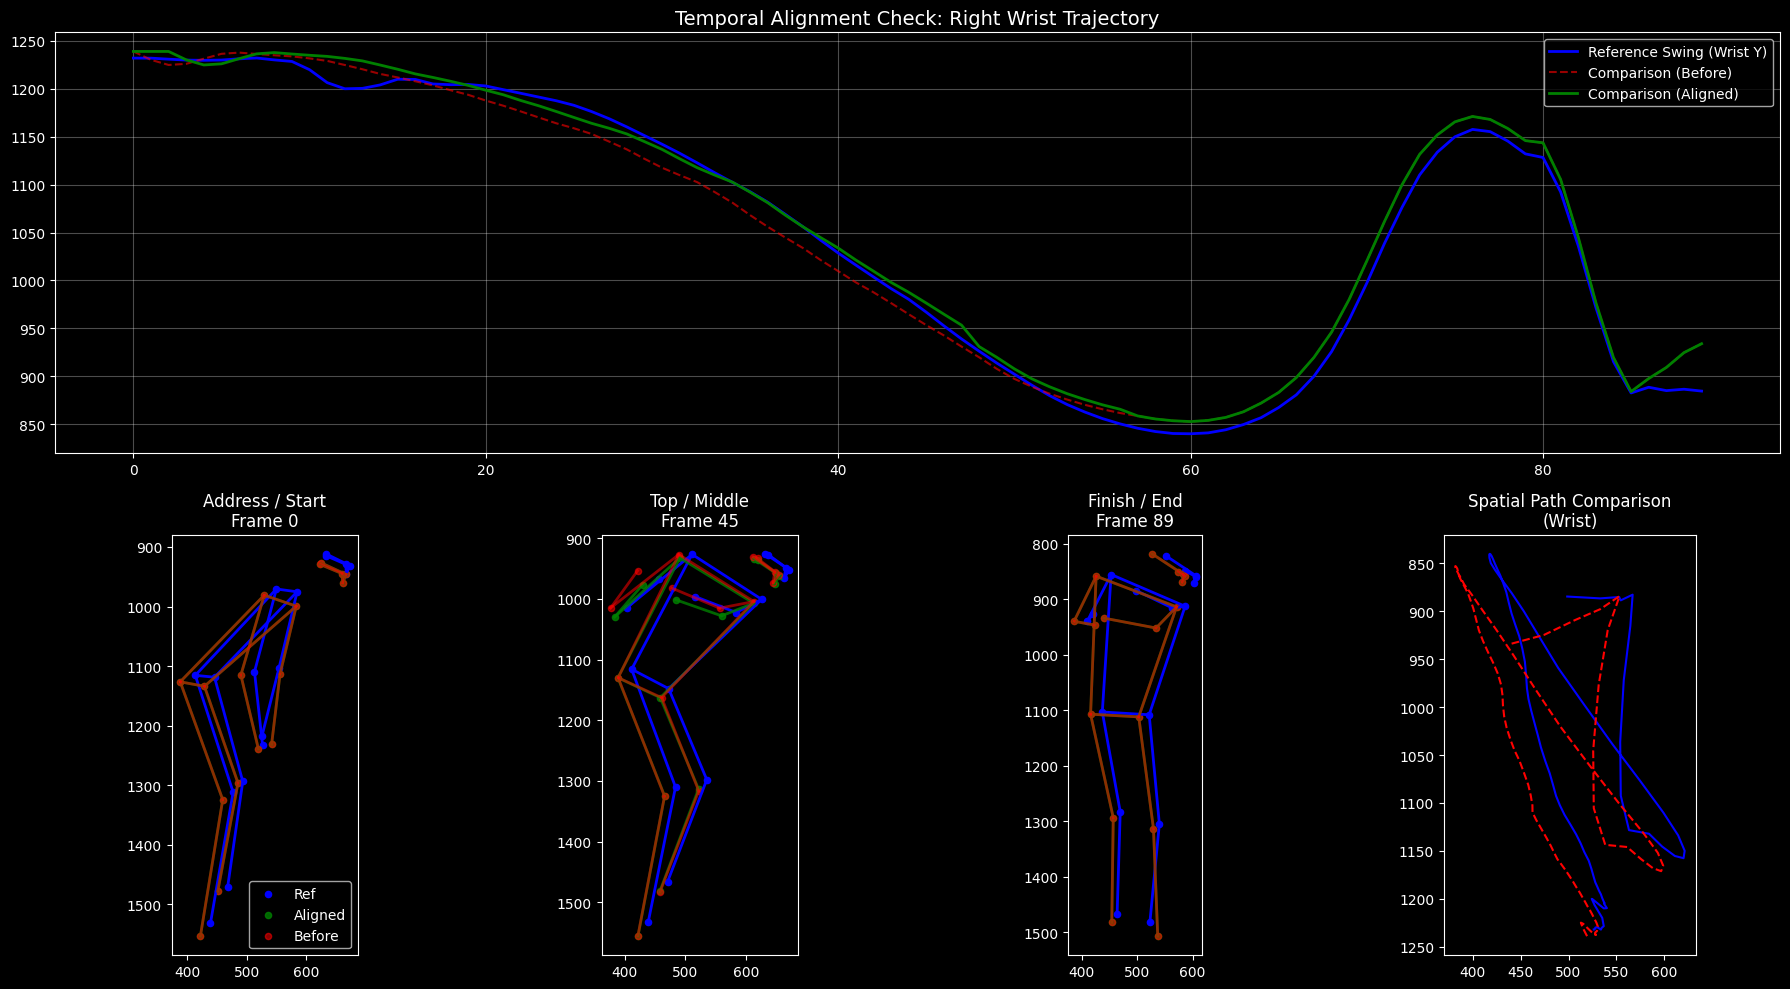

In [84]:
# 1. Calculate DTW
print("Calculating DTW...")
path = calculate_dtw_path(kp_original, kp_comparison)

# 2. Warp Comparison to Reference
print("Warping Sequence...")
aligned_comp_kps = align_sequence_to_ref(kp_original, kp_comparison, path)

# 3. Plot
print("Plotting...")
visualize_alignment(kp_original, kp_comparison, aligned_comp_kps)

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# ==========================================
# CONSTANTS & CONFIG
# ==========================================

# Standard COCO Keypoint format (17 points)
# 0:Nose, 1:LEye, 2:REye, 3:LEar, 4:REar, 5:LSh, 6:RSh, 7:LElb, 8:RElb, 9:LWri, 10:RWri, 
# 11:LHip, 12:RHip, 13:LKnee, 14:RKnee, 15:LAnk, 16:RAnk
SKELETON_CONNECTIONS = [
    (5, 7), (7, 9),       # Left Arm
    (6, 8), (8, 10),      # Right Arm
    (5, 6),               # Shoulders
    (5, 11), (6, 12),     # Torso
    (11, 12),             # Hips
    (11, 13), (13, 15),   # Left Leg
    (12, 14), (14, 16),   # Right Leg
    (0, 1), (0, 2), (1, 3), (2, 4) # Head
]

# ==========================================
# HELPER FUNCTIONS
# ==========================================

def _calculate_dtw_path(seq1, seq2):
    """Computes the DTW path between two sequences (Frames, Keypoints, 2)."""
    s1_flat = seq1.reshape(seq1.shape[0], -1)
    s2_flat = seq2.reshape(seq2.shape[0], -1)

    dist_matrix = cdist(s1_flat, s2_flat, metric='euclidean')
    n, m = dist_matrix.shape
    
    # Initialize and fill cost matrix
    cost = np.zeros((n, m))
    cost[0, 0] = dist_matrix[0, 0]

    for i in range(1, n):
        cost[i, 0] = cost[i-1, 0] + dist_matrix[i, 0]
    for j in range(1, m):
        cost[0, j] = cost[0, j-1] + dist_matrix[0, j]

    for i in range(1, n):
        for j in range(1, m):
            cost[i, j] = dist_matrix[i, j] + min(cost[i-1, j], cost[i, j-1], cost[i-1, j-1])

    # Backtrack
    path = []
    i, j = n-1, m-1
    path.append((i, j))
    while i > 0 or j > 0:
        if i == 0: j -= 1
        elif j == 0: i -= 1
        else:
            min_val = min(cost[i-1, j], cost[i, j-1], cost[i-1, j-1])
            if min_val == cost[i-1, j-1]: i, j = i-1, j-1
            elif min_val == cost[i-1, j]: i -= 1
            else: j -= 1
        path.append((i, j))
    
    return path[::-1]

def _align_sequence_to_ref(ref_seq, target_seq, path):
    """Warps target_seq to match ref_seq timeline using the DTW path."""
    n_frames_ref = ref_seq.shape[0]
    warped_target = np.zeros_like(ref_seq)
    
    path_dict = {}
    for i, j in path:
        if i not in path_dict: path_dict[i] = []
        path_dict[i].append(j)
    
    for i in range(n_frames_ref):
        if i in path_dict:
            target_idx = int(np.mean(path_dict[i]))
            warped_target[i] = target_seq[target_idx]
        else:
            warped_target[i] = target_seq[path_dict.get(i-1, [0])[0]]

    return warped_target

def _draw_skeleton_on_ax(ax, kps, color, label=None, alpha=1.0):
    """Helper to draw stick figure on matplotlib axis."""
    ax.scatter(kps[:, 0], kps[:, 1], s=20, color=color, alpha=alpha, label=label)
    for idx1, idx2 in SKELETON_CONNECTIONS:
        if idx1 < len(kps) and idx2 < len(kps):
            x = [kps[idx1, 0], kps[idx2, 0]]
            y = [kps[idx1, 1], kps[idx2, 1]]
            ax.plot(x, y, color=color, lw=2, alpha=alpha)

def _visualize_results(kps_ref, kps_target, kps_warped):
    """Generates the comparison plots."""
    fig = plt.figure(figsize=(18, 10))
    
    # 1. Temporal Alignment (Wrist Y-coordinate)
    ax_temp = plt.subplot2grid((2, 4), (0, 0), colspan=4)
    wrist_idx = 10 
    ax_temp.plot(kps_ref[:, wrist_idx, 1], 'b-', label='Reference (Wrist Y)', lw=2)
    ax_temp.plot(kps_target[:, wrist_idx, 1], 'r--', label='Comparison (Raw)', alpha=0.6)
    ax_temp.plot(kps_warped[:, wrist_idx, 1], 'g-', label='Comparison (Aligned)', lw=2)
    ax_temp.set_title("Temporal Alignment Check: Right Wrist Trajectory", fontsize=14)
    ax_temp.legend()
    ax_temp.grid(True, alpha=0.3)

    # 2. Skeleton Snapshots
    indices_to_show = [0, len(kps_ref)//2, len(kps_ref)-1]
    titles = ["Start", "Mid-Swing", "Finish"]
    
    for i, idx in enumerate(indices_to_show):
        ax = plt.subplot2grid((2, 4), (1, i))
        _draw_skeleton_on_ax(ax, kps_ref[idx], color='blue', label='Ref' if i==0 else None)
        _draw_skeleton_on_ax(ax, kps_warped[idx], color='green', label='Aligned' if i==0 else None, alpha=0.7)
        
        # Show ghost of original target frame if within bounds (approximate)
        if idx < len(kps_target):
            _draw_skeleton_on_ax(ax, kps_target[idx], color='red', label='Raw' if i==0 else None, alpha=0.3)
            
        ax.set_title(f"{titles[i]}\nFrame {idx}")
        ax.invert_yaxis()
        ax.set_aspect('equal')
        if i == 0: ax.legend()

    # 3. Geometric Path View
    ax_geo = plt.subplot2grid((2, 4), (1, 3))
    ax_geo.plot(kps_ref[:, 10, 0], kps_ref[:, 10, 1], 'b-', label='Ref Path')
    ax_geo.plot(kps_target[:, 10, 0], kps_target[:, 10, 1], 'r--', label='Raw Path')
    ax_geo.set_title("Spatial Path (Wrist)", fontsize=12)
    ax_geo.invert_yaxis()
    ax_geo.set_aspect('equal')

    plt.tight_layout()
    plt.show()

# ==========================================
# MAIN PIPELINE FUNCTION
# ==========================================

def run_alignment_pipeline(ref_seq, target_seq, visualize=True):
    """
    High-level entry point to align two kinematic sequences.
    
    Args:
        ref_seq (np.array): Reference sequence of shape (Frames, Keypoints, 2)
        target_seq (np.array): Comparison sequence of shape (Frames, Keypoints, 2)
        visualize (bool): Whether to generate matplotlib plots.
        
    Returns:
        tuple: (aligned_target_seq, dtw_path)
    """
    # 1. Compute Dynamic Time Warping path
    print(f"Aligning sequences: Ref {ref_seq.shape} vs Target {target_seq.shape}...")
    path = _calculate_dtw_path(ref_seq, target_seq)
    
    # 2. Warp the target sequence to match the reference timeline
    aligned_seq = _align_sequence_to_ref(ref_seq, target_seq, path)
    
    # 3. Visualize if requested
    if visualize:
        print("Generating alignment visualization...")
        _visualize_results(ref_seq, target_seq, aligned_seq)
        
    return aligned_seq, path

Aligning sequences: Ref (90, 17, 2) vs Target (90, 17, 2)...
Generating alignment visualization...


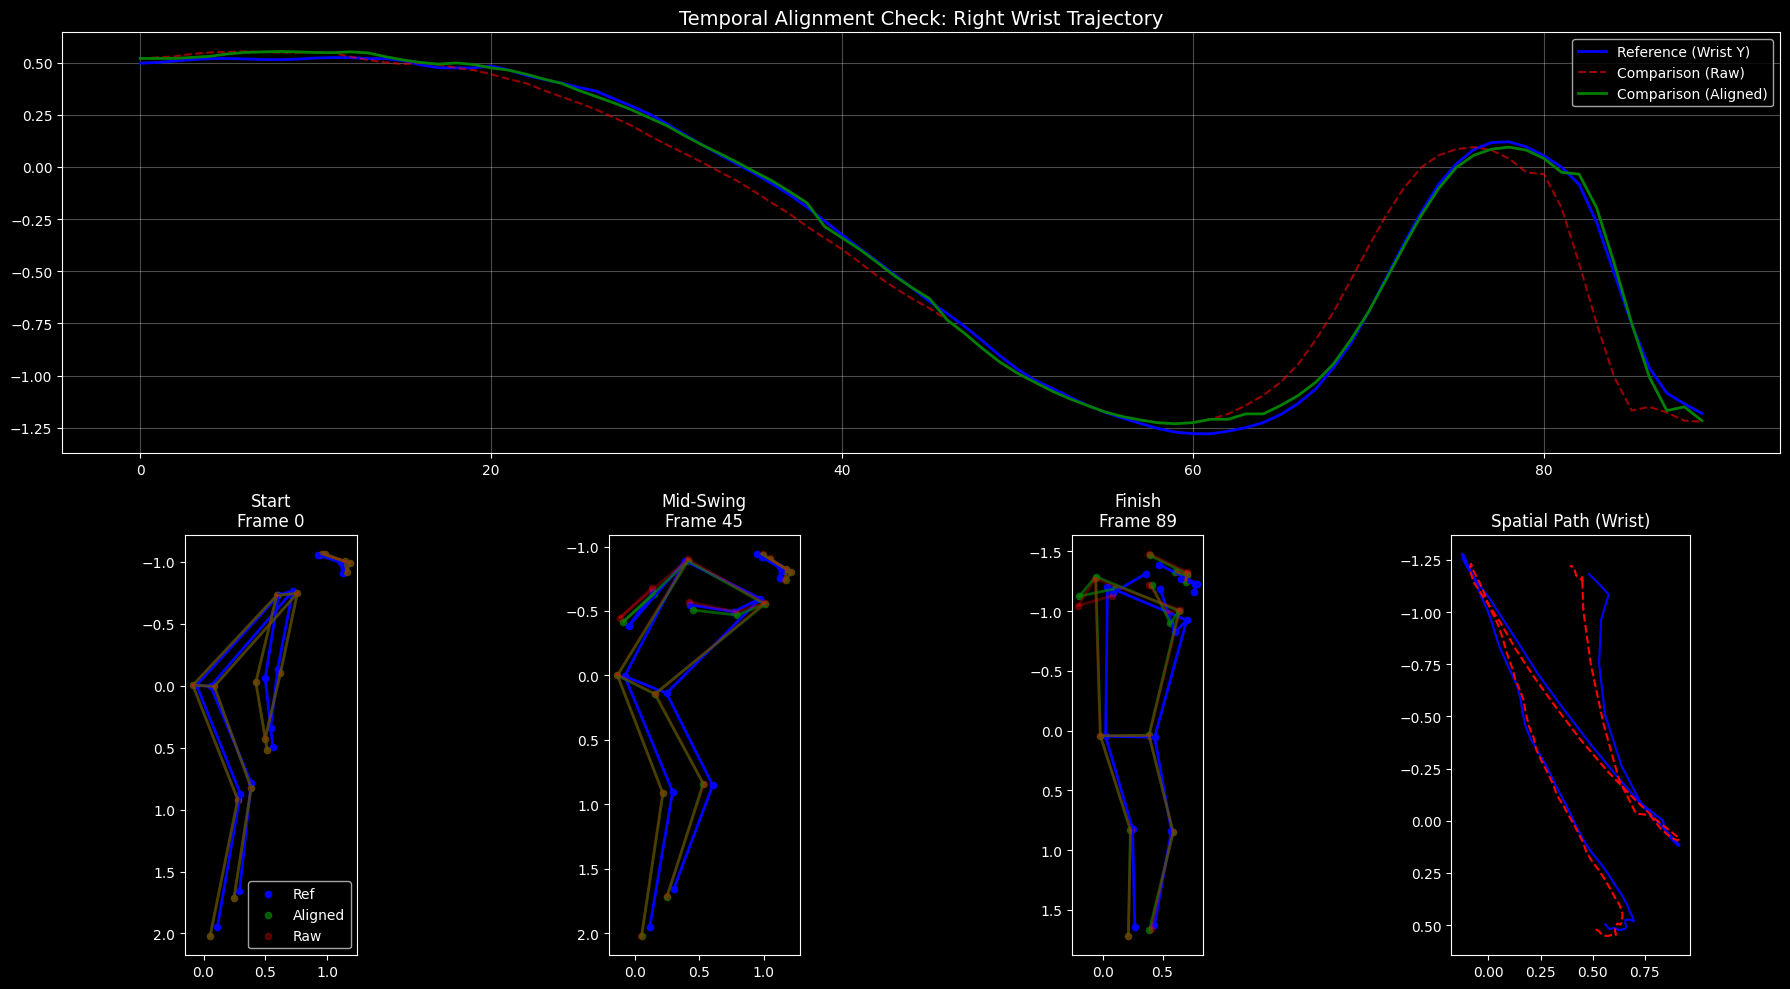

In [150]:
aligned_seq, path = run_alignment_pipeline(kp_original, kp_comparison)